>Ready-For-Handin
## Comparing state-spaces. 
This notebook contains the code for comparing approximative metods (Linear programming) in Markov Decision Processes(MDP) and Dynamic Programming (Tabular methods). 

The script is created by Frederik Peetz-Schou Larsen, at the Technical University of Denmark. 

**If its the first time running, run the first cell else skip it**

In [ ]:
using Pkg;
Pkg.add("POMDPs");
Pkg.add("QMDP");
Pkg.add("DiscreteValueIteration");
Pkg.add("LocalApproximationValueIteration");
Pkg.add("POMDPModels");
Pkg.add("GridInterpolations");
Pkg.add("LocalFunctionApproximation");
Pkg.add("Plots");
Pkg.add("Statistics");
Pkg.add("ProgressMeter")

In [1]:
## 2nd++ runners may start here
using POMDPs
using POMDPModels
using GridInterpolations
using LocalFunctionApproximation
using LocalApproximationValueIteration
using DiscreteValueIteration
using Plots
using Statistics
using ProgressMeter

In [3]:
# Function to create an MDP with a specific state space size
function create_mdp(grid_size)
    SCALE = grid_size / 10
    mdp = SimpleGridWorld(
        size=(grid_size, grid_size),
        rewards=Dict(GWPos(x, y) => SCALE for x in 4*SCALE:6*SCALE, y in 4*SCALE:6*SCALE)
    )
    return mdp
end


create_mdp (generic function with 1 method)

In [4]:
# Function to solve an MDP using tabular Value Iteration
function solve_tabular(mdp)
    solver = ValueIterationSolver(max_iterations=1000, belres=1e-6, verbose=false)
    policy = solve(solver, mdp)
    return policy
end

solve_tabular (generic function with 1 method)

In [5]:
# Function to solve an MDP using Local Approximation Value Iteration
function solve_approximation(mdp, vertices_per_axis, state_size)

    my_grid = RectangleGrid(
        1:vertices_per_axis:state_size,  # x
        1:vertices_per_axis:state_size   # y
    )

    interp = LocalGIFunctionApproximator(my_grid)
    approx_solver = LocalApproximationValueIterationSolver(interp, verbose=true, max_iterations=1000, is_mdp_generative=false)
    policy = solve(approx_solver, mdp)
    return policy
end


solve_approximation (generic function with 1 method)

In [9]:
# Vary the state space size and solve MDPs
state_space_sizes = [100]
tabular_convergence_times = []
approximation_convergence_times = []
state_sizes = state_space_sizes
# Create a progress bar to track the loop
progress = Progress(length(state_space_sizes), desc="Solving MDPs")

for grid_size in state_space_sizes
    mdp = create_mdp(grid_size)

    # Measure time for tabular method
    tabular_start_time = time()
    tabular_policy = solve_tabular(mdp)
    tabular_end_time = time()
    tabular_convergence_time = tabular_end_time - tabular_start_time
    push!(tabular_convergence_times, tabular_convergence_time)

    # Measure time for approximation method
    approximation_start_time = time()
    approximation_policy = solve_approximation(mdp, Int(grid_size / 10), grid_size)  # Use VERTICES_PER_AXIS = 10 for approximation
    approximation_end_time = time()
    approximation_convergence_time = approximation_end_time - approximation_start_time
    push!(approximation_convergence_times, approximation_convergence_time)

    next!(progress)  # Update the progress bar
end


[Iteration 1   ] residual:         10 | iteration runtime:      0.138 ms, (  0.000138 s total)
[Iteration 2   ] residual:      0.671 | iteration runtime:      0.137 ms, (  0.000275 s total)
[Iteration 3   ] residual:       0.58 | iteration runtime:      0.159 ms, (  0.000433 s total)
[Iteration 4   ] residual:      0.503 | iteration runtime:      0.134 ms, (  0.000567 s total)
[Iteration 5   ] residual:      0.436 | iteration runtime:      0.130 ms, (  0.000697 s total)
[Iteration 6   ] residual:      0.379 | iteration runtime:      0.126 ms, (  0.000823 s total)
[Iteration 7   ] residual:      0.329 | iteration runtime:      0.125 ms, (  0.000948 s total)
[Iteration 8   ] residual:      0.287 | iteration runtime:      0.125 ms, (   0.00107 s total)
[Iteration 9   ] residual:      0.251 | iteration runtime:      0.124 ms, (    0.0012 s total)
[Iteration 10  ] residual:      0.219 | iteration runtime:      0.123 ms, (   0.00132 s total)
[Iteration 11  ] residual:      0.192 | iteration 

In [115]:
start_value = 1
end_value = 1000
num_steps = end_value / 10

step = (end_value - start_value) / (num_steps - 1)
step = ceil((end_value - start_value) / (num_steps - 1))


# Create the range
my_range = range(start_value, stop=end_value, step=step)

# Print the range
println(collect(my_range))  # Collect the range into an array for display


[1.0, 12.0, 23.0, 34.0, 45.0, 56.0, 67.0, 78.0, 89.0, 100.0, 111.0, 122.0, 133.0, 144.0, 155.0, 166.0, 177.0, 188.0, 199.0, 210.0, 221.0, 232.0, 243.0, 254.0, 265.0, 276.0, 287.0, 298.0, 309.0, 320.0, 331.0, 342.0, 353.0, 364.0, 375.0, 386.0, 397.0, 408.0, 419.0, 430.0, 441.0, 452.0, 463.0, 474.0, 485.0, 496.0, 507.0, 518.0, 529.0, 540.0, 551.0, 562.0, 573.0, 584.0, 595.0, 606.0, 617.0, 628.0, 639.0, 650.0, 661.0, 672.0, 683.0, 694.0, 705.0, 716.0, 727.0, 738.0, 749.0, 760.0, 771.0, 782.0, 793.0, 804.0, 815.0, 826.0, 837.0, 848.0, 859.0, 870.0, 881.0, 892.0, 903.0, 914.0, 925.0, 936.0, 947.0, 958.0, 969.0, 980.0, 991.0]


In [98]:
state_size = 200
desired_vertices = 20

# Calculate vertices_per_axis based on the proportion between state_size and desired_vertices
vertices_per_axis = round(Int, state_size / (desired_vertices / 10))

# Ensure that vertices_per_axis is at least 1
vertices_per_axis = max(vertices_per_axis, 1)

# Create the grid with whole numbers
my_grid = RectangleGrid(
    range(1, state_size, length=vertices_per_axis), # x
    range(1, state_size, length=vertices_per_axis)  # y
)


RectangleGrid{2}([1.0, 3.01010101010101, 5.02020202020202, 7.03030303030303, 9.04040404040404, 11.05050505050505, 13.06060606060606, 15.070707070707071, 17.08080808080808, 19.09090909090909  …  181.9090909090909, 183.91919191919192, 185.92929292929293, 187.93939393939394, 189.94949494949495, 191.95959595959596, 193.96969696969697, 195.97979797979798, 197.989898989899, 200.0],[1.0, 3.01010101010101, 5.02020202020202, 7.03030303030303, 9.04040404040404, 11.05050505050505, 13.06060606060606, 15.070707070707071, 17.08080808080808, 19.09090909090909  …  181.9090909090909, 183.91919191919192, 185.92929292929293, 187.93939393939394, 189.94949494949495, 191.95959595959596, 193.96969696969697, 195.97979797979798, 197.989898989899, 200.0],)

In [130]:
state_size = 100
vertices_per_axis = 10
step = ceil((state_size - 1) / (vertices_per_axis - 1))
r = range(1, stop=state_size, step=step)
my_grid = RectangleGrid(r, r
)

RectangleGrid{2}([1.0, 12.0, 23.0, 34.0, 45.0, 56.0, 67.0, 78.0, 89.0, 100.0],[1.0, 12.0, 23.0, 34.0, 45.0, 56.0, 67.0, 78.0, 89.0, 100.0],)

In [135]:

# Function to solve an MDP using Local Approximation Value Iteration
function solve_approximation2(mdp, vertices_per_axis, state_size)
    step = ceil((state_size - 1) / (vertices_per_axis - 1))
    r = range(1, stop=state_size, step=step)
    my_grid = RectangleGrid(r, r
    )

    interp = LocalGIFunctionApproximator(my_grid)
    approx_solver = LocalApproximationValueIterationSolver(interp, verbose=true, max_iterations=1000, is_mdp_generative=false)
    policy = solve(approx_solver, mdp)
    return policy
end


grid_size = 100
mdp = create_mdp(grid_size)
approximation_policy = solve_approximation(mdp, 20, grid_size)

tabular_policy = solve_tabular(mdp)

[Iteration 1   ] residual:         10 | iteration runtime:      0.036 ms, (  3.56E-05 s total)
[Iteration 2   ] residual:      0.333 | iteration runtime:      0.035 ms, (  7.04E-05 s total)
[Iteration 3   ] residual:        0.3 | iteration runtime:      0.030 ms, (  0.000101 s total)
[Iteration 4   ] residual:      0.271 | iteration runtime:      0.032 ms, (  0.000133 s total)
[Iteration 5   ] residual:      0.245 | iteration runtime:      0.031 ms, (  0.000164 s total)
[Iteration 6   ] residual:      0.222 | iteration runtime:      0.029 ms, (  0.000192 s total)
[Iteration 7   ] residual:      0.201 | iteration runtime:      0.029 ms, (  0.000221 s total)
[Iteration 8   ] residual:      0.182 | iteration runtime:      0.031 ms, (  0.000252 s total)
[Iteration 9   ] residual:      0.165 | iteration runtime:      0.030 ms, (  0.000282 s total)
[Iteration 10  ] residual:      0.149 | iteration runtime:      0.029 ms, (  0.000311 s total)
[Iteration 11  ] residual:      0.136 | iteration 

ValueIterationPolicy:
 [1, 1] -> :up
 [2, 1] -> :right
 [3, 1] -> :right
 [4, 1] -> :right
 [5, 1] -> :right
 [6, 1] -> :right
 [7, 1] -> :right
 [8, 1] -> :right
 [9, 1] -> :right
 [10, 1] -> :right
 [11, 1] -> :right
 [12, 1] -> :right
 [13, 1] -> :right
 [14, 1] -> :right
 [15, 1] -> :right
 [16, 1] -> :right
 [17, 1] -> :right
 [18, 1] -> :right
 [19, 1] -> :right
 …

In [136]:
print(action(approximation_policy, [3, 1]))
print(action(tabular_policy, [3, 1]))

upright

## Plotting

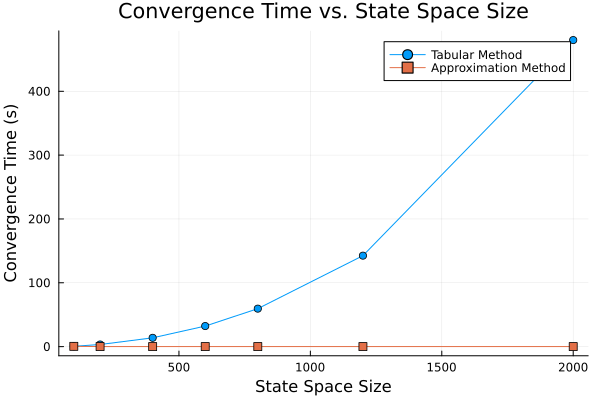

In [8]:
# Create a plot
# Now you can create a plot using the grid and interp
plot(
    state_space_sizes, tabular_convergence_times,
    label="Tabular Method", marker=:circle,
    xlabel="State Space Size", ylabel="Convergence Time (s)",
    title="Convergence Time vs. State Space Size",
    legend=:topright,
)
plot!(
    state_space_sizes, approximation_convergence_times,
    label="Approximation Method", marker=:square,
)